<a href="https://colab.research.google.com/github/singlatushar07/BCS_Workshop_Apr_20/blob/master/Machine_Learning/Assignment/MLAssignmentFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/bcs-iitk/BCS_Workshop_Apr_20/blob/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/bcs-iitk/BCS_Workshop_Apr_20/blob/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/ML.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [0]:
# Copyright (c) 2020 Brain and Cognitive Society, IIT Kanpur [ BCS @IITK ]
# Copyright under MIT License, must reference https://github.com/bcs-iitk/BCS_Workshop_Apr_20 if used anywhere else.
# Author: Shashi Kant (http://shashikg.github.io/)



> Note: Do not forget to click on **Copy to Drive** in Google Colab to save a copy of this assignment.

![copy2drive](https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/copy2drive.png)



# Assignment 1: Machine Learning


## Question 1: Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

!wget --no-check-certificate https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/X.npy -O X.npy
!wget --no-check-certificate https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/y.npy -O y.npy

--2020-04-04 18:30:52--  https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/X.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bcs-iitk/BCS_Workshop_Apr_20/master/Machine_Learning/Assignment/X.npy [following]
--2020-04-04 18:30:52--  https://raw.githubusercontent.com/bcs-iitk/BCS_Workshop_Apr_20/master/Machine_Learning/Assignment/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2020-04-04 18:30:52 (37.6 MB/s) - ‘X.npy’ save

In [0]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X = np.load(path_X)
  y = np.load(path_y)
  X = np.column_stack((np.ones((y.shape[0], 1)), X))
  # -------------------------------

  return X, y

In [0]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  D = X.shape[1]
  out_shape = y.shape[1]
  # -------------------------------
  
  W = np.random.randn(D, out_shape)

  return W

In [0]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  error = np.subtract(y,y_pred)
  error = np.square(error).sum()
  # -------------------------------

  return error

In [0]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  W = np.linalg.pinv(X.T@X)@X.T@y
  # -------------------------------

  return W

In [0]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  W = get_linear_model(X, y)
  error_hist = []
  for i in range(epochs):
    grad = (lr) * (X.T @ (X@W - y))
    W = np.subtract(W, grad)
    error_hist.append(MSE(y, X@W))
    
  # -------------------------------

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

274.1004840917282


Text(0.5, 1.0, 'Plot of y')

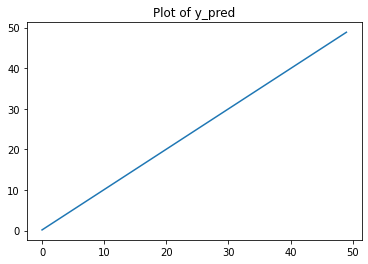

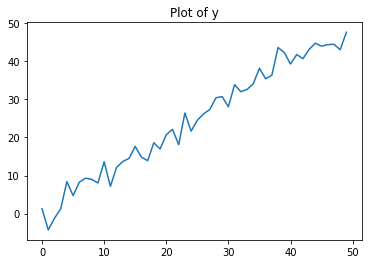

In [49]:
# Write your code here ----------
  X, y = load_data_LR()
  W = train_by_algebra(X, y)
  error = MSE(y, X@W)
  print(error)
  plt.figure(0)
  plt.plot(X@W)
  plt.title('Plot of y_pred')
  plt.figure(1)
  plt.plot(y)
  plt.title('Plot of y')

# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

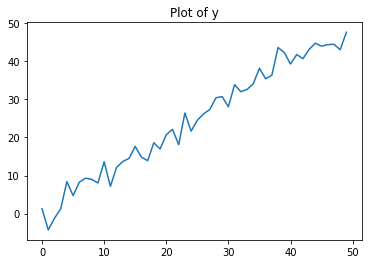

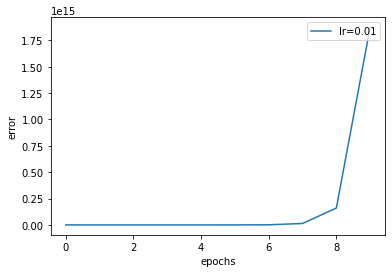

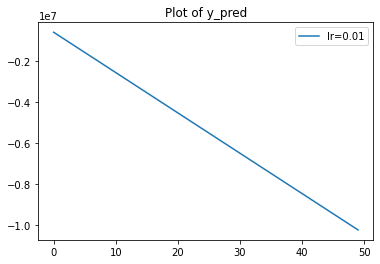

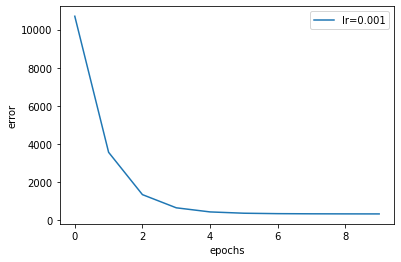

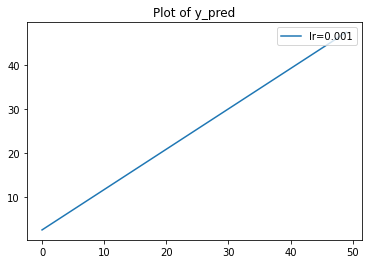

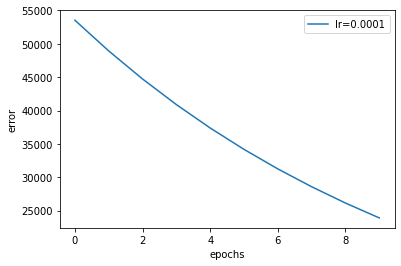

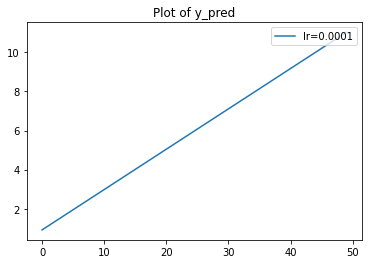

In [67]:
# Write your code here ----------
  X, y = load_data_LR()
  epochs = 10
  lr = [0.01, 0.001, 0.0001]
  label = ['lr=0.01', 'lr=0.001', 'lr=0.0001']
  # for i in range(3):
  #   (W, hist) = train_by_GD(X, y, epochs, lr[i])
  #   plt.figure(3*i + 0)
  #   plt.plot(list(range(epochs)), hist, label=label[i])
  #   plt.xlabel('epochs')
  #   plt.ylabel('error')
  #   plt.legend(loc="upper right")
  #   plt.figure(3*1 + 1)
  #   plt.plot(X@W, label=label[i])
  #   plt.title('Plot of y_pred')
  #   plt.legend(loc="upper right")
  #   plt.figure(3 * i + 2)
  #   plt.plot(y)
  #   plt.title('Plot of y')
  plt.figure(0)
  plt.plot(y)
  plt.title('Plot of y')

  
  
  (W, hist) = train_by_GD(X, y, epochs, 0.01)
  plt.figure(1)
  plt.plot(list(range(epochs)), hist, label='lr=0.01')
  plt.xlabel('epochs')
  plt.ylabel('error')
  plt.legend(loc="upper right")
  plt.figure(2)
  plt.plot(X@W, label='lr=0.01')
  plt.title('Plot of y_pred')
  plt.legend(loc="upper right")

  (W, hist) = train_by_GD(X, y, epochs, 0.001)
  plt.figure(3)
  plt.plot(list(range(epochs)), hist, label='lr=0.001')
  plt.xlabel('epochs')
  plt.ylabel('error')
  plt.legend(loc="upper right")
  plt.figure(4)
  plt.plot(X@W, label='lr=0.001')
  plt.title('Plot of y_pred')
  plt.legend(loc="upper right")

  (W, hist) = train_by_GD(X, y, epochs, 0.0001)
  plt.figure(5)
  plt.plot(list(range(epochs)), hist, label='lr=0.0001')
  plt.xlabel('epochs')
  plt.ylabel('error')
  plt.legend(loc="upper right")
  plt.figure(6)
  plt.plot(X@W, label='lr=0.0001')
  plt.axis('auto')
  plt.title('Plot of y_pred')
  plt.legend(loc="upper right")


# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [0]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  cifar10 = tf.keras.datasets.cifar10
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)
  x_train = x_train / 255.0
  x_test = x_test / 255.0
  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [0]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(7200, activation='relu'),
                                      tf.keras.layers.Dense(2304, activation='relu'),
                                      tf.keras.layers.Dense(1024, activation='relu'),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dense(num_class, activation='softmax')

                               
  ])
  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [0]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dense(num_class, activation='softmax')


  ])
  # -------------------------------

  return model

### Compile and train the fully connected neural network model using the above functions.

Epoch 1/10
98/98 [==============================] - 2s 24ms/step - loss: 2.0644 - accuracy: 0.2779 - val_loss: 1.9852 - val_accuracy: 0.2847
Epoch 2/10
98/98 [==============================] - 2s 22ms/step - loss: 1.8856 - accuracy: 0.3363 - val_loss: 1.8314 - val_accuracy: 0.3645
Epoch 3/10
98/98 [==============================] - 2s 23ms/step - loss: 1.8201 - accuracy: 0.3614 - val_loss: 1.8068 - val_accuracy: 0.3599
Epoch 4/10
98/98 [==============================] - 2s 23ms/step - loss: 1.7781 - accuracy: 0.3756 - val_loss: 1.8265 - val_accuracy: 0.3534
Epoch 5/10
98/98 [==============================] - 2s 23ms/step - loss: 1.7388 - accuracy: 0.3904 - val_loss: 1.7137 - val_accuracy: 0.3970
Epoch 6/10
98/98 [==============================] - 2s 23ms/step - loss: 1.7139 - accuracy: 0.3992 - val_loss: 1.7314 - val_accuracy: 0.3802
Epoch 7/10
98/98 [==============================] - 2s 23ms/step - loss: 1.6797 - accuracy: 0.4132 - val_loss: 1.6733 - val_accuracy: 0.4191
Epoch 8/10
98

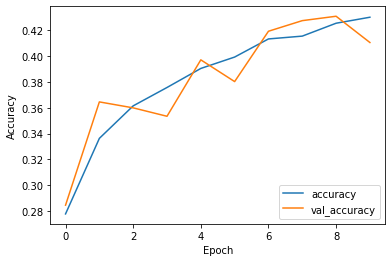

In [73]:
# Write your code here ----------
x_train, y_train, x_test, y_test = load_data_cifar10_norm()
model = build_fc_model()
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer='sgd', metrics=['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 1s 14ms/step - loss: 1.9734 - accuracy: 0.2746 - val_loss: 1.7311 - val_accuracy: 0.3736
Epoch 2/10
98/98 [==============================] - 1s 12ms/step - loss: 1.6118 - accuracy: 0.4181 - val_loss: 1.5176 - val_accuracy: 0.4568
Epoch 3/10
98/98 [==============================] - 1s 12ms/step - loss: 1.4556 - accuracy: 0.4745 - val_loss: 1.4119 - val_accuracy: 0.4921
Epoch 4/10
98/98 [==============================] - 1s 12ms/step - loss: 1.3797 - accuracy: 0.5075 - val_loss: 1.3277 - val_accuracy: 0.5276
Epoch 5/10
98/98 [==============================] - 1s 12ms/step - loss: 1.3037 - accuracy: 0.5370 - val_loss: 1.2842 - val_accuracy: 0.5428
Epoch 6/10
98/98 [==============================] - 1s 12ms/step - loss: 1.2607 - accuracy: 0.5519 - val_loss: 1.3044 - val_accuracy: 0.5391
Epoch 7/10
98/98 [==============================] - 1s 12ms/step - loss: 1.2131 - accuracy: 0.5721 - val_loss: 1.2279 - val_accuracy: 0.5612
Epoch 8/10
98

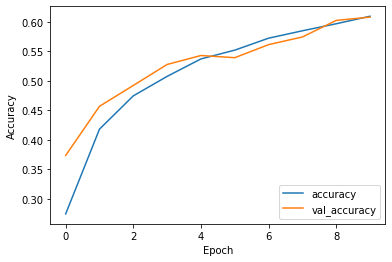

In [74]:
# Write your code here ----------
x_train, y_train, x_test, y_test = load_data_cifar10_norm()
model = build_cnn_model()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [75]:
print("The accuracy for CNN model is more than that for FC model. Also number of trainnable parameters for CNN model is less than that for FC model, so computation cost for CNN model is also less.")

The accuracy for CNN model is more than that for FC model. Also number of trainnable parameters for CNN model is less than that for FC model, so computation cost for CNN model is also less.


## Question 3: Image Classification in Tensorflow using Transfer Learning
In this we will again try to learn a classification model for **cifar10** but by using the concept of transfer learning. 

### Brief description on Transfer Learning:

The idea behind transfer learning for image classification is that when you train a model on a very large image dataset like ImageNet, then this model can effectivly serve as generic model of visual world. If you remember, a closer look at every CNN model gives you an idea that every CNN model used to have some sets of convolutional layers followed by a dense layer and finally at last a classification (output) layer. So, here the convolutional layer somewhat act as feature mapping function which maps the input image to an different dimensional space. And finally at the end you apply dense layer to classify the images based on those extracted features. <br>

**Inshort this what you do in a CNN model:**
![](https://github.com/bcs-iitk/BCS_Workshop_Apr_20/raw/master/Machine_Learning/Assignment/cnn_model.png)

So what we will do in transfer learning is that we will use some already pre-trained model which are trained on ImageNet dataset. Will only use its learned convolutional layers as a feature mapping function. And finally will learn a fully connected neural network on those features to classify the images.


### Attributes of Transfer Learning model to be build

*   Pre-trained weights of VGG16 will be used as feature extracter
*   After this flatten the output and use dense layer of **64 neurons**



In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16

In [0]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [0]:
def load_data_cifar10():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  cifar10 = tf.keras.datasets.cifar10
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)
  #x_train = x_train / 255.0
  #x_test = x_test / 255.0
  # -------------------------------

  return preprocess_input(x_train), y_train, preprocess_input(x_test), y_test

In [0]:
def build_tl_model(num_class=10):
  # should return the ccombined model using the VGG16 conv layers as conv layers
  # and for fully connected layer part use the above attributes.

  base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet') # this is the conv layers from VGG16
  base_model.trainable = False # this ensures that while training the dense layers these weights don't get changed

  model = tf.keras.models.Sequential([
    # Feature extractor 
    base_model,

    # Flatten and use the attribute given the question to build the dense part
    # Write your code here ----------
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
    # -------------------------------
  ])

  return model

### Compile and train the model using above functions, use adam optimiser with learning rate = 0.0001

Epoch 1/10
98/98 [==============================] - 5s 47ms/step - loss: 14.2165 - accuracy: 0.1459 - val_loss: 8.8184 - val_accuracy: 0.2318
Epoch 2/10
98/98 [==============================] - 4s 42ms/step - loss: 6.9322 - accuracy: 0.2962 - val_loss: 5.8668 - val_accuracy: 0.3379
Epoch 3/10
98/98 [==============================] - 4s 42ms/step - loss: 5.0183 - accuracy: 0.3733 - val_loss: 4.6193 - val_accuracy: 0.3906
Epoch 4/10
98/98 [==============================] - 4s 42ms/step - loss: 4.0595 - accuracy: 0.4109 - val_loss: 3.8763 - val_accuracy: 0.4158
Epoch 5/10
98/98 [==============================] - 4s 42ms/step - loss: 3.4432 - accuracy: 0.4341 - val_loss: 3.3673 - val_accuracy: 0.4336
Epoch 6/10
98/98 [==============================] - 4s 42ms/step - loss: 2.9995 - accuracy: 0.4507 - val_loss: 2.9939 - val_accuracy: 0.4444
Epoch 7/10
98/98 [==============================] - 4s 42ms/step - loss: 2.6658 - accuracy: 0.4655 - val_loss: 2.6986 - val_accuracy: 0.4536
Epoch 8/10
9

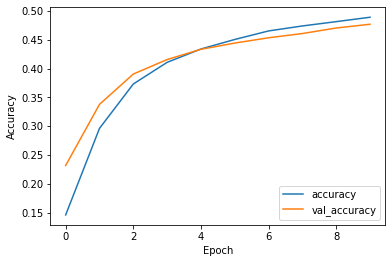

In [80]:
# Write your code here ----------
x_train, y_train, x_test, y_test = load_data_cifar10()
model = build_tl_model(10)
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

## Question 4: Reinforcement Learning
In this you have to implement and train an RL agent to find a path for a frozen lake problem. 

### Frozen Lake Problem Description:

> Imagine there is a frozen lake stretching from your home to your office; you have to walk on the frozen lake to reach your office. But oops! There are holes in the frozen lake so you have to be careful while walking on the frozen lake to avoid getting trapped in the holes. [[src](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788836524/3/ch03lvl1sec32/solving-the-frozen-lake-problem)]

![frozen-lake](https://static.packt-cdn.com/products/9781788836524/graphics/49f3e058-2f32-40e8-9992-b53d1f57d138.png)


Two task you have to do here:

*   Implement a frozen lake scenario given the inputs, number of holes (M) and size of the lake (N) (Assume the lake is square). Starting point will be (0, 0) and goal will be to reach at (N-1, N-1)
*   Implemenat Q-learning method to learn a path from start to goal.
*   Use the following reward scheme: 50 points on reaching the goal, -50 points on stepping on a hole.

#### Q-learning
Recall from the lecture video that `Q[state, action]` gives you an action state pair to get an optimal policy. Recall the Q-Loss from the lecture video i.e:
> $E = ||r + \gamma \cdot \max_{a'} Q(s', a') - Q(s, a)||^2$

Use gradient descent to minimise $E$ and work out a learning rule for $Q(s, a)$. 
> Take $\max_{a'} Q(s', a')$ and $r$ to be independent of $Q(s, a)$.


### Defining important functions

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

In [0]:
ActionMap = ['Up', 'Right', 'Down', 'Left']

In [0]:
def get_board(N, M):
  # should return an N x N size frozen lake - board with M randomle placed holes.
  # use 'S' representation for starting point
  # use 'G' representation for goal point
  # use 'H' representation for holes
  # use 'F' for frozen lakes 
  # Refer the representation from the image shown above

  # Write your code here ----------
  array = ['H']*M + ['F']*(N*N-(2+M))
  random.shuffle(array)
  board = np.ones((N, N), dtype=object)
  board[0][0] = 'S'
  board[N-1][N-1] = 'G'
  for i in range(N):
    for j in range(N):
      if board[i][j] == 'S' or board[i][j] == 'G':
        continue
      else:
        board[i][j] = array.pop()
  # -------------------------------

  return board

In [0]:
def get_reward(board, N, M):
  # should return an N x N size reward table for the generated frozen lake scenario
  # use 50 reward for 'G' point
  # use -50 reward for 'H' point
  # o for rest.

  # Write your code here ----------
  reward = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      if board[i][j] == 'H':
        reward[i][j] = -50
      elif board[i][j] == 'G':
        reward[i][j] = 50
  # -------------------------------

  return reward

In [0]:
class FrozenLake:
  def __init__(self, N, M):
    # Recall python class, this function is called when you first initialise the class
    # Should intialise the board and reward table based on the reward scheme
    # Select M numbers of holes randomly

    self.board = get_board(N, M)
    self.init_board = copy.deepcopy(self.board) 
    self.reward = get_reward(self.board, N, M)
    self.state = (0, 0)
    self.finish = 0
    self.N = N
    self.holes = 0


  def reset(self):
    # should reset the env with board to initial state
    # hint: set self.state at 0, 0 and use self.init_board to reset self.board

    # Write your code here ----------
    self.state = (0, 0)
    self.board = copy.deepcopy(self.init_board)
    # -------------------------------
    self.finish = 0
    self.holes = 0

    return self.state
  
  def step(self, action):
    # ===== Action Table =========
    #     0 -- UP
    #     1 -- RIGHT
    #     2 -- DOWN
    #     3 -- LEFT
    # perform the given action and get update the  self.state, get reward, and update the self.board according to new state

    # Write your code here ----------

    #print("Previous: ", self.state)

    if action == 0:
      self.state = (self.state[0]-1, self.state[1])
    elif action == 1:
      self.state = (self.state[0], self.state[1]+1)
    elif action == 2:
      self.state = (self.state[0]+1, self.state[1])
    elif action == 3:
      self.state = (self.state[0], self.state[1]-1)

    #print("New: ", self.state)

    reward = self.reward[self.state[0], self.state[1]]

    self.board = copy.deepcopy(self.init_board)
    if self.board[self.state[0]][self.state[1]] == 'H':
      self.holes += 1
    self.board[self.state[0]][self.state[1]] = 'C'

    # -------------------------------
    
    # status to check if you reached your goal
    if self.state == (self.N-1, self.N-1):
        self.finish = 1
        
    return self.state, reward, self.finish
  
  def get_random_action(self):
    # ===== Action Table =========
    #     0 -- UP
    #     1 -- RIGHT
    #     2 -- DOWN
    #     3 -- LEFT
    # should return a possible random action out of the four
    # hint: note that when you are around the corner or sides of the board not all four action will be available for you

    # Write your code here ----------
    flag = 0
    actionList = [0, 1, 2, 3]
    while flag != 1:
      a = random.choice(actionList)
      if self.isValidAction(a):
        action = a
        flag = 1
    # -------------------------------

    return action    
      
  def display(self):
    print(self.board)

  def isValidAction(self, action):
    temp = copy.deepcopy(self.state)
    if action == 0:
      temp = (temp[0]-1, temp[1])
    elif action == 1:
      temp = (temp[0], temp[1]+1)
    elif action == 2:
      temp = (temp[0]+1, temp[1])
    elif action == 3:
      temp = (temp[0], temp[1]-1)
    
    if temp[0] in range(self.N) and temp[1] in range(self.N):
      return True
    else:
      return False

### Environment creation and learning

In [0]:
def explore_exploit(env, Q, state, episode):
  # Recall from the video there are two way how you perform an action in Value Learning
  # They are called explore or exploit?
  # Notice that if you always select your new action based on maximum Q-value you will never get to see any new path right?
  # You have to explore the environment to know new paths
  # Write your code here to randomly select whether you want to explore or exploit
  # The probability of exploration should be exp(-episode*5e-4)
  # for exploration get some random action
  # for exploitation get action based on max Q value

  # Write your code here ----------
  epsilon = np.exp(-episode*5*0.0001)

  if random.uniform(0, 1) < epsilon:
    action = env.get_random_action()
    #print("random action")
  else:
    #action = np.argmax(Q[:, env.state[0], env.state[1]])
    for i in np.argsort(-1*Q[:, env.state[0], env.state[1]]):
      if env.isValidAction(i):
        action = i
        break

  # -------------------------------

  return action

In [0]:
def init_env_and_learn(N=6, M=12, gamma=0.8, lr=0.8):
  # gamma: gamma param of total discounted reward
  # lr: learning rate for Q updates
  # N = grid size of frozen lake wil be N x N
  # M = Number of holes
  # returns env, Q-function, rewards

  env = FrozenLake(N, M)
  Q = np.zeros((4, N, N))

  total_episodes = 3000 # i.e. the number of times your RL agent will run through the board.
  max_steps = N*N*3 # maximum number of steps to perform

  rewards = []
  for episode in range(total_episodes):
    state = env.reset()
    total_rewards = 0

    for step in range(max_steps):
      action = explore_exploit(env, Q, state, episode)

      # Write your code here ----------------------------------------------------------
      # Should perform the action get reward, new_state, finish status and update the Q value
      new_state, reward, finish = env.step(action)
      Q[action, state[0], state[1]] = Q[action, state[0], state[1]] + lr * (reward + gamma * np.max(Q[:, new_state[0], new_state[1]]) - Q[action, state[0], state[1]])


      # reward = '...' # replace these with your values
      # finish = '...' # replace these with your values
      # new_state = '...' # replace these with your values
      # # -------------------------------------------------------------------------------

      total_rewards += reward
      state = new_state
      
      if finish == 1: 
          break

    rewards.append(total_rewards)

  return env, Q, rewards

In [0]:
def travel_path(env, Q):
  # write a function to display a sequence of path performed using the learned Q-values
  # show initial and final frozen lake board 
  # to perform an action at a state simply take max of Q at that state

  # Write your code here ----------
  print("Initial Board")
  print(env.board)
  while env.finish != 1:
    action = np.argmax(Q[:, env.state[0], env.state[1]])
    env.step(action)
    print(action)
    print(env.board)
  print("holes: ",  env.holes)

  # -------------------------------

  return

### Use N = 6, M = 10 and learn the models for following sets of gamma and lr:

*   `(gamma, lr) = (0.8, 0.8)`
*   `(gamma, lr) = (0.95, 0.8)`
*   `(gamma, lr) = (0.6, 0.8)`
*   `(gamma, lr) = (0.8, 0.95)`
*   `(gamma, lr) = (0.8, 0.1)`

Plot rewards vs episode for each of them and compare.



Replace this with your observation


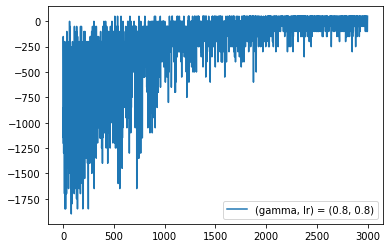

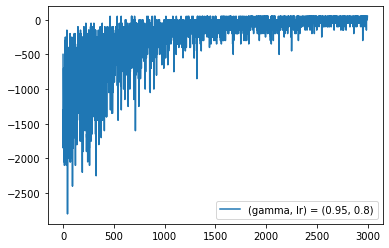

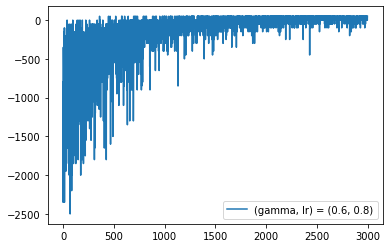

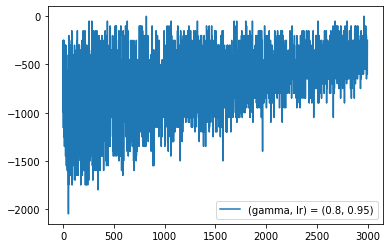

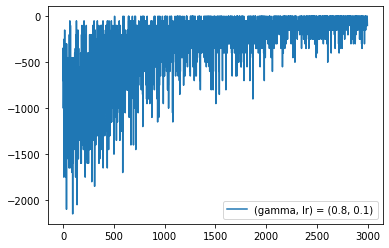

In [89]:
# Write your code here ----------
env, Q, rewards = init_env_and_learn(6, 10, 0.8, 0.8)
plt.figure(0)
plt.plot(rewards, label='(gamma, lr) = (0.8, 0.8)')
plt.legend(loc='lower right')

env, Q, rewards = init_env_and_learn(6, 10, 0.95, 0.8)
plt.figure(1)
plt.plot(rewards, label='(gamma, lr) = (0.95, 0.8)')
plt.legend(loc='lower right')

env, Q, rewards = init_env_and_learn(6, 10, 0.6, 0.8)
plt.figure(2)
plt.plot(rewards, label='(gamma, lr) = (0.6, 0.8)')
plt.legend(loc='lower right')

env, Q, rewards = init_env_and_learn(6, 10, 0.8, 0.95)
plt.figure(3)
plt.plot(rewards, label='(gamma, lr) = (0.8, 0.95)')
plt.legend(loc='lower right')

env, Q, rewards = init_env_and_learn(6, 10, 0.8, 0.1)
plt.figure(4)
plt.plot(rewards, label='(gamma, lr) = (0.8, 0.1)')
plt.legend(loc='lower right')
# -------------------------------

print("Replace this with your observation")

### Use N = 6, M = 10 and learn a models with (gamma, lr) = (0.8, 0.8)
After learning the model, display a path traveled from source to goal.

In [90]:
# Write your code here ----------
env, Q, rewards = init_env_and_learn(6, 10, 0.8, 0.8)
env.reset()
travel_path(env, Q)


Initial Board
[['S' 'F' 'F' 'F' 'F' 'H']
 ['H' 'H' 'F' 'F' 'F' 'H']
 ['H' 'F' 'F' 'H' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'G']]
1
[['S' 'C' 'F' 'F' 'F' 'H']
 ['H' 'H' 'F' 'F' 'F' 'H']
 ['H' 'F' 'F' 'H' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'G']]
1
[['S' 'F' 'C' 'F' 'F' 'H']
 ['H' 'H' 'F' 'F' 'F' 'H']
 ['H' 'F' 'F' 'H' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'G']]
1
[['S' 'F' 'F' 'C' 'F' 'H']
 ['H' 'H' 'F' 'F' 'F' 'H']
 ['H' 'F' 'F' 'H' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'G']]
1
[['S' 'F' 'F' 'F' 'C' 'H']
 ['H' 'H' 'F' 'F' 'F' 'H']
 ['H' 'F' 'F' 'H' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'G']]
2
[['S' 'F' 'F' 'F' 'F' 'H']
 ['H' 'H' 'F' 'F' 'C' 'H']
 ['H' 'F' 'F' 'H' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['H' 'H' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' 'F' 'F' 'G']